#### Name: Marwa Samy
#### Project:Titanic_Survivors

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
print('Numbers of rows are',data.shape[0])
print('Numbers of Columns are',data.shape[1])

Numbers of rows are 891
Numbers of Columns are 12


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [224]:
data.describe(include='all').round()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891.0,891,891,714.0,891.0,891.0,891,891.0,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ross, Mr. John Hugo",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.0,0.0,2.0,NaN,NaN,30.0,1.0,0.0,NaN,32.0,NaN,NaN
std,257.0,0.0,1.0,NaN,NaN,15.0,1.0,1.0,NaN,50.0,NaN,NaN
min,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN
25%,224.0,0.0,2.0,NaN,NaN,20.0,0.0,0.0,NaN,8.0,NaN,NaN
50%,446.0,0.0,3.0,NaN,NaN,28.0,0.0,0.0,NaN,14.0,NaN,NaN
75%,668.0,1.0,3.0,NaN,NaN,38.0,1.0,0.0,NaN,31.0,NaN,NaN


Data Cleaning

In [225]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
data['Embarked'].mode()

0    S
dtype: object

In [227]:
data['Embarked'].fillna('S',inplace=True)

In [228]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [229]:
#drop Column
data.drop('Cabin',axis=1,inplace=True)

In [230]:
data.isnull().sum().any()

False

In [231]:
data.duplicated().sum()

0

In [232]:
#Convert data type
data['Age']=data['Age'].astype(int)
data.head(1)['Age']

0    22
Name: Age, dtype: int32

Calculate Summary Statistics

In [234]:
df=data['Embarked'].value_counts()
df

S    646
C    168
Q     77
Name: Embarked, dtype: int64

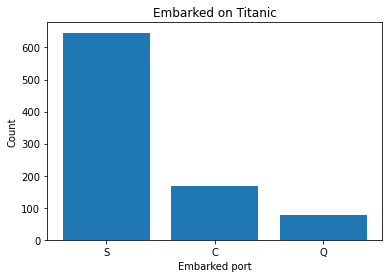

In [235]:
plt.bar(df.index,df.values)
plt.title('Embarked on Titanic')
plt.xlabel('Embarked port')
plt.ylabel('Count')
plt.show()

In [236]:
data['Sex'].mode()[0]

'male'

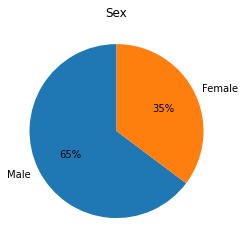

In [237]:
sex=data['Sex'].value_counts()
labels=['Male','Female']
plt.pie(sex,labels=labels,autopct='%1.0f%%',startangle=90)
plt.title('Sex')
plt.show()

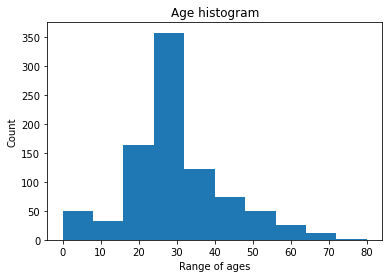

In [238]:
plt.hist(data['Age'])
plt.title('Age histogram')
plt.xlabel('Range of ages')
plt.ylabel('Count')
plt.show()

In [239]:
Yes=(sum(data['Survived']==1)/data['Survived'].count())*100
No=(sum(data['Survived']==0)/data['Survived'].count())*100

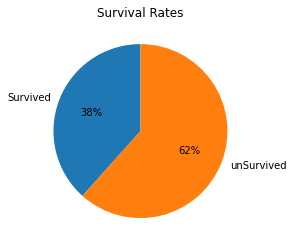

In [240]:
labels=['Survived','unSurvived']
plt.pie([Yes,No],autopct='%1.0f%%',startangle=90,labels=labels)
plt.title('Survival Rates')
plt.show()

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

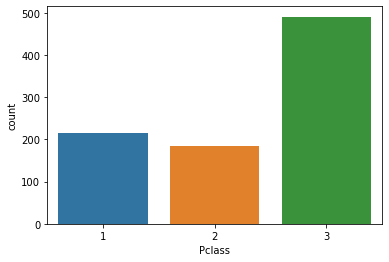

In [241]:
sns.countplot(data['Pclass'])

Who has better chance to Survival (Male or Female)?

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

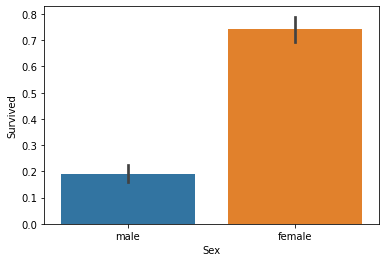

In [242]:
sns.barplot(x='Sex',y='Survived',data=data)

Which Passenger Class has better chance to Survival (First,Second,Third Class)?

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

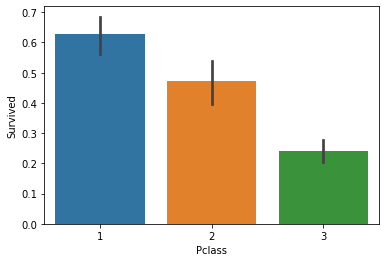

In [243]:
sns.barplot(x='Pclass',y='Survived',data=data)

In [244]:
data['Family Size']=data['SibSp']+data['Parch']
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S,1


In [246]:
data['Fare_Per_Person']=data['Fare']/(data['Family Size']+1)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,7.92500
